In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as st

# File to Load 
car_data_path = Path("true_car_listings.csv")

# Read Car Data File and store into Pandas DataFrames
car_data = pd.read_csv(car_data_path)

In [2]:
car_data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
# Confirm the number of States in the State Column
car_data['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [5]:
# Merge the states as appropriate 
car_data['State'] = car_data['State'].replace({' Fl': ' FL', ' Ca': ' CA', ' ga': ' GA', ' Oh': ' OH', ' Md': ' MD', ' Az': ' AZ',
                                              ' Va': ' VA', ' Ga': ' GA'})

In [6]:
# Remove the spaces in the names of the state abbreviations within the state column
car_data['State'] = car_data['State'].str.replace(' ', '')

In [7]:
# Look for and extract duplicates within the Vin column
duplicates = car_data.duplicated(subset= ['Vin'], keep=False)
extracted = car_data.loc[duplicates, 'Vin'].unique()
extracted

array(['1G1ZB5E09CF258888', '1GNSCBKC1GR183490', '1G1PC5SB7F7269381',
       '1G1BE5SM6H7103748', '2G1FE1EVXA9224849', 'KL8CB6SAXGC571402',
       '2G1FB1EV2A9127699', '2G11Y5SL4E9113294', '1GCNCPEA4BZ433469',
       '2G1FB1E32F9136442', '1G11Y5SL0EU121654', '2G11Y5SL5E9201836',
       '1G11Y5SL5EU125232', '1G11Y5SLXEU108457', '2G11Y5SL9E9265460',
       '2G11Y5SLXE9183558', '2G1FA1E37E9293949', '2G1FB1E32F9284364',
       '2G11Z5SA9G9130915', '2G1WT58K781214125', '2G1105S30H9120402',
       '1GCNCNEC9GZ402232', '1G1JC6SH8E4194609', '2GNFLGE38H6240856',
       '1G1125S39EU113487', '2G1FB1E30F9190774', '1G1RA6E44EU129757',
       'KL8CB6S9XDC531399', '2GNALDEK3H1546084', 'KL8CD6S99EC501340',
       '1GCPKPEX0AZ237480', '1GCNCPEH0FZ302445', '1FMCU0F75GUA44645',
       '3FA6P0H93GR316968', '3FADP4BJ5GM148345', '3FA6P0HD1ER204199',
       '1FMCU0GX9GUA19732', '1FADP3K2XHL216581', '1FADP3F2XEL437586',
       '1FADP3K25EL443656', '1FADP3F24DL182433', '3FA6P0G72DR373223',
       '3FADP4EJ5DM1

In [8]:
# Create Data Frame with just the duplicate Vins
duplicate_vin = car_data[car_data['Vin'].isin(extracted)]
duplicate_vin

,Price,Year,Mileage,City,State,Vin,Make,Model
84302,8599,2012,48618,Morrow,GA,1G1ZB5E09CF258888,Chevrolet,MalibuLS
84753,4289,2016,34449,Blair,NE,1GNSCBKC1GR183490,Chevrolet,Tahoe2WD
93226,11781,2015,40533,Seattle,WA,1G1PC5SB7F7269381,Chevrolet,Cruze1LT
107069,1718,2017,45556,Temple Hills,MD,1G1BE5SM6H7103748,Chevrolet,CruzeSedan
115222,14500,2010,1500,Albuquerque,NM,2G1FE1EVXA9224849,Chevrolet,Camaro2dr
...,...,...,...,...,...,...,...,...
252356,7999,2013,60211,Gower,MO,3FADP4EJ5DM144447,Ford,FiestaHatchback
252357,7999,2014,72450,Dallas,TX,1FADP3E24EL218186,Ford,FocusSedan
252358,13588,2016,22345,Madison,TN,1FADP3F24GL320976,Ford,FocusSedan
252359,13902,2016,30364,Manvel,TX,1FADP3F21GL319896,Ford,FocusSedan


In [9]:
# Sort by Vin numbers
sorted_vin = duplicate_vin.sort_values('Vin')
sorted_vin

,Price,Year,Mileage,City,State,Vin,Make,Model
252357,7999,2014,72450,Dallas,TX,1FADP3E24EL218186,Ford,FocusSedan
249444,7999,2014,72450,Dallas,TX,1FADP3E24EL218186,Ford,FocusSedan
252359,13902,2016,30364,Manvel,TX,1FADP3F21GL319896,Ford,FocusSedan
249446,13902,2016,30364,Manvel,TX,1FADP3F21GL319896,Ford,FocusSedan
249441,8490,2013,57933,Laurel,MD,1FADP3F24DL182433,Ford,FocusSedan
...,...,...,...,...,...,...,...,...
120958,6990,2013,59960,Houston,TX,KL8CB6S9XDC531399,Chevrolet,SparkLS
115885,11000,2016,9315,Irving,TX,KL8CB6SAXGC571402,Chevrolet,SparkLS
134567,12488,2016,9315,Irving,TX,KL8CB6SAXGC571402,Chevrolet,SparkLS
120841,9849,2014,42334,WACO,TX,KL8CD6S99EC501340,Chevrolet,Spark1LT


In [10]:
# Create a new Data Frame without the duplicate Vin numbers
duplicates_dropped = car_data[~car_data['Vin'].isin(extracted)]
duplicates_dropped

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [11]:
# Create a new Data Frame
cleaned_car_data = duplicates_dropped

In [12]:
# Export clean data to a CSV File
cleaned_car_data.to_csv('Cleaned_Data.csv', index=False)

In [13]:
# Import cleaned data as well as Per Capita Income (PCI) Data
# PCI Data was obtained from the FRED website
new_car_data_path = Path("Cleaned_Data.csv")
pci_data_path = Path("per_capita_income.csv")
new_car_data = pd.read_csv(new_car_data_path)
pci_data = pd.read_csv(pci_data_path)
new_car_data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852023,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852024,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852025,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852026,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [14]:
# Rename column in pci data
pci_data.rename(columns={'A792RC0Q052SBEA': 'Per Capita Income (USD)', 'DATE': 'Date'}, inplace=True)
pci_data

,Date,Per Capita Income (USD)
0,1999-01-01,28562.50
1,2000-01-01,30527.75
2,2001-01-01,31530.00
3,2002-01-01,31775.50
4,2003-01-01,32624.25
5,2004-01-01,34151.50
6,2005-01-01,35628.00
7,2006-01-01,37821.25
8,2007-01-01,39549.00
9,2008-01-01,40801.25


In [16]:
# Change the data type of date column
pci_data['Date'] = pd.to_datetime(pci_data['Date'])

# Change the data type of year column
new_car_data['Year'] = new_car_data['Year'].astype(str)

In [40]:
# Drop rows with data from unwanted years
new_car_data.drop(new_car_data[(new_car_data['Year'] == '1997') | (new_car_data['Year'] == '1998')].index, inplace=True)

In [41]:
# Extract year from the date column & assign it to a new column
pci_data['Year'] = pci_data['Date'].dt.year
pci_data['Year'] = pci_data['Year'].astype(str)

In [19]:
import requests
import json
import prettytable

# Set the headers for the API request
headers = {'Content-type': 'application/json'}

# Define the data payload for the API request
data = json.dumps({
    "seriesid": ['CUUR0000SA0'],  
    "startyear": "2009",           
    "endyear": "2018",
    "annualaverage": "true"
})

# Make a POST request to the BLS API
response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    json_data = response.json()
    for series in json_data['Results']['series']:
        x = prettytable.PrettyTable(["series id", "year", "period", "value", "footnotes"])
        cpi = series['seriesID']
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes=""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M13':
                x.add_row([cpi, year, period, value, footnotes[0:-1]])
        output = open(cpi + '.txt', 'w')
        output.write(x.get_string())
        output.close()
else:
    print('Error:', response.status_code)
    
# This was a call to the BLS API to obtain the Consumer Price Index (CPI) data for the years in our data set 1999-2018
# The API would only allow for 10 years at a time so I modified the code for 1999-2008 first beofre 2009-2018 as you see in
# the code above. These was saved to txt files and combined into a csv before being imported below

In [20]:
# File to Load 
cpi_path = Path("cpi.csv")

# Read CPI Data File and store into Pandas DataFrames
cpi_data = pd.read_csv(cpi_path)
cpi_data.head()

,year,value
0,2018,251.107
1,2017,245.120
2,2016,240.007
3,2015,237.017
4,2014,236.736


In [22]:
# Rename columns in CPI table
cpi_data.rename(columns={'year': 'Year'}, inplace=True)
cpi_data.rename(columns={'value': 'CPI'}, inplace=True)
cpi_data['Year'] = cpi_data['Year'].astype(str)

In [42]:
# Merge new car data DF with PCI data before merging that with CPI data
merged_data = pd.merge(new_car_data, pci_data, how="left", on="Year")
merged_data = pd.merge(merged_data, cpi_data, how="left", on="Year")
merged_data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Date,Per Capita Income (USD),CPI
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,2014-01-01,46256.75,236.736
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,2013-01-01,44366.50,232.957
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,2013-01-01,44366.50,232.957
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,2014-01-01,46256.75,236.736
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,2016-01-01,48943.00,240.007


In [43]:
# Drop data column as it is not needed
merged_data.drop(columns=['Date'], inplace=True)
merged_data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Per Capita Income (USD),CPI
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,46256.75,236.736
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,44366.50,232.957
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,44366.50,232.957
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,46256.75,236.736
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,48943.00,240.007


In [51]:
# Create a list of years from 1999-2017 called years
years = [str(year) for year in range(1999, 2018)]

# Define the value of x which is the cpi calue for the year of our analysis, 2018
x = 251.107

# Calculate the prices and per capita income for all rows adjusted in the years 1999-2017 adjusted for inflation
merged_data['Price Adjusted'] = round(merged_data['Price'] * (x / merged_data['CPI']),2)
merged_data['PCI Adjusted'] = round(merged_data['Per Capita Income (USD)'] * (x / merged_data['CPI']),2)

# Replace the adjusted prices and per capita income with the original prices for rows where the year is not in the list years
merged_data.loc[~merged_data['Year'].isin(years), 'Price Adjusted'] = merged_data.loc[~merged_data['Year'].isin(years), 'Price']
merged_data.loc[~merged_data['Year'].isin(years), 'PCI Adjusted'] = merged_data.loc[~merged_data['Year'].isin(years), 'Per Capita Income (USD)']

# Display the updated DataFrame
merged_data


,Price,Year,Mileage,City,State,Vin,Make,Model,Per Capita Income (USD),CPI,Price Adjusted,PCI Adjusted
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,46256.75,236.736,9541.04,49064.75
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,44366.50,232.957,11736.30,47823.15
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,44366.50,232.957,9695.81,47823.15
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,46256.75,236.736,11666.69,49064.75
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,48943.00,240.007,15483.43,51206.55
...,...,...,...,...,...,...,...,...,...,...,...,...
850653,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6,50977.25,245.120,64759.01,52222.36
850654,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,50977.25,245.120,74024.93,52222.36
850655,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD,48943.00,240.007,58588.88,51206.55
850656,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90,50977.25,245.120,61711.35,52222.36


In [52]:
# Create a new data frame to use for vizualisations and extract needed columns
filtered_data = merged_data[['Year', 'Mileage', 'Price Adjusted', 'PCI Adjusted']]
filtered_data.head()

,Year,Mileage,Price Adjusted,PCI Adjusted
0,2014,35725,9541.04,49064.75
1,2013,19606,11736.30,47823.15
2,2013,48851,9695.81,47823.15
3,2014,39922,11666.69,49064.75
4,2016,22142,15483.43,51206.55


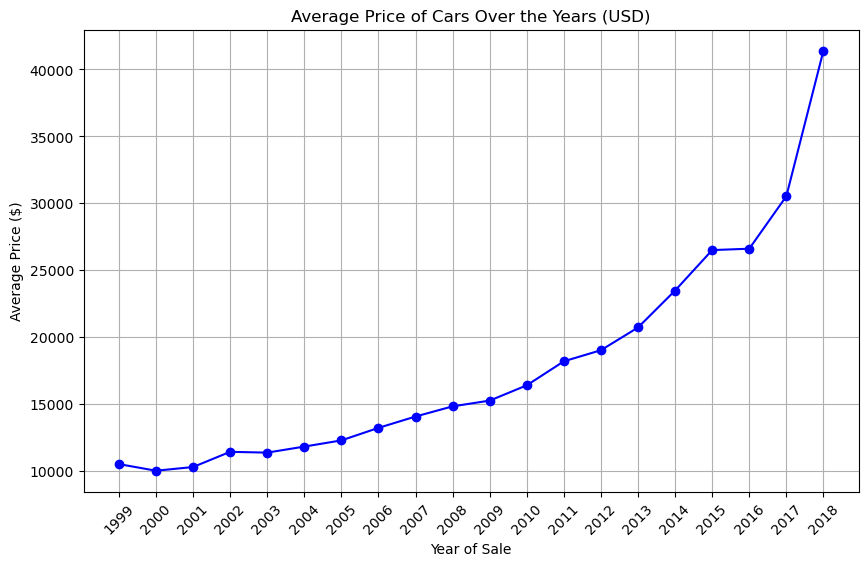

In [84]:
# Create a line graph of the average price of a used car over the years (adjusted for inflation)
average_sale_price = filtered_data.groupby('Year')['Price Adjusted'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_price_year_sale.index, average_price_year_sale.values, marker='o', color='blue')
plt.title('Average Price of Cars Over the Years (USD)')
plt.xlabel('Year of Sale')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

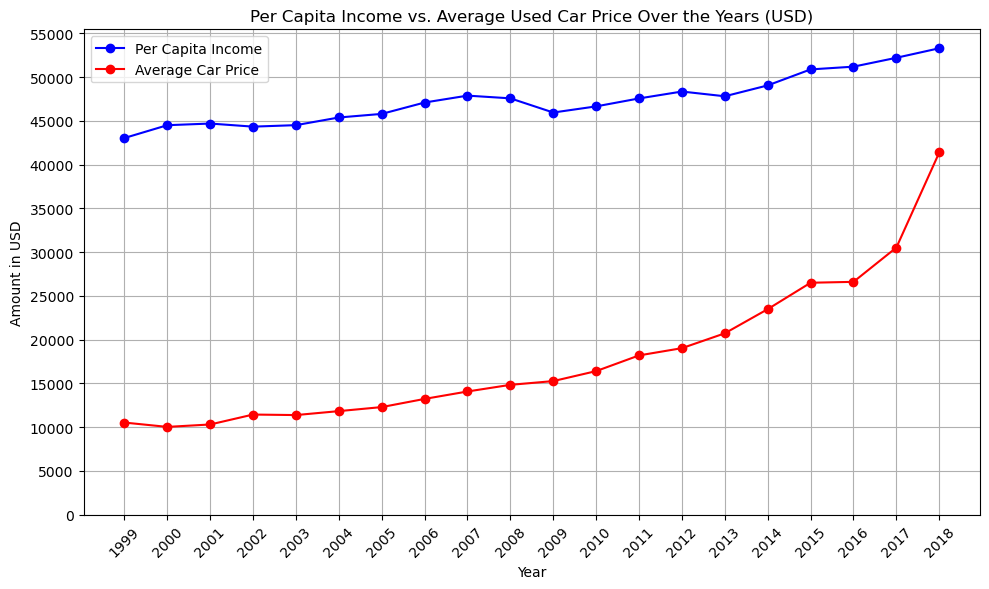

In [83]:
# Find the average of the car prices & group the per capita income
average_car_price = filtered_data.groupby('Year')['Price Adjusted'].mean()
yearly_pci = filtered_data.groupby('Year')['PCI Adjusted'].mean()
plt.figure(figsize=(10, 6))

# Plot line for per capita income
plt.plot(yearly_pci.index, yearly_pci.values, marker='o', color='blue', linestyle='-', label='Per Capita Income')

# Plot line for average car price
plt.plot(average_car_price.index, average_car_price.values, marker='o', color='red', linestyle='-', label='Average Car Price')

# Set labels and title
plt.title('Per Capita Income vs. Average Used Car Price Over the Years (USD)')
plt.xlabel('Year')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(average_car_price.values.max(), yearly_pci.values.max())) + 5000, 5000))
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

The r-value is 0.20110221759198962


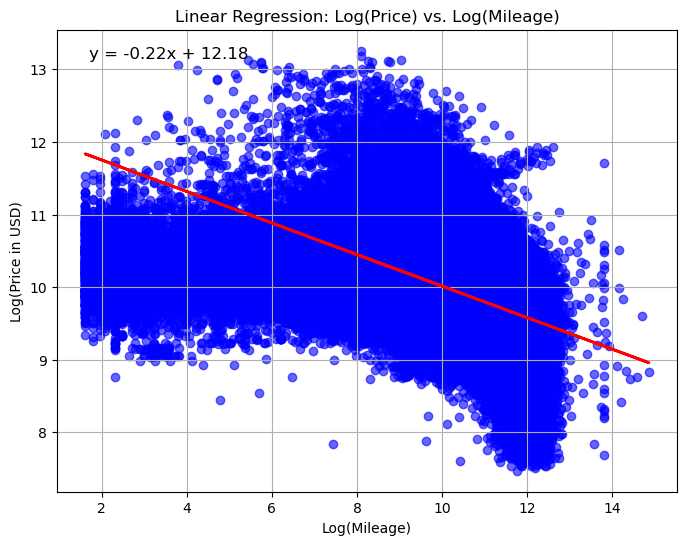

In [80]:
# Create a scatter plot of price vs per capita income and plot the linear regression
x_values = np.log(filtered_data['Mileage'])
y_values = np.log(filtered_data['Price Adjusted'])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is {rvalue**2}")

# Calculate the regression line
regress_values = x_values * slope + intercept

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', alpha=0.6)
plt.plot(x_values, regress_values, color='red', linewidth=2)

# Annotate the regression equation
plt.annotate(line_eq, (min(x_values) + 0.1, max(y_values) - 0.1), fontsize=12, color="black")

# Set labels and title
plt.xlabel('Log(Mileage)')
plt.ylabel('Log(Price in USD)')
plt.title('Linear Regression: Log(Price) vs. Log(Mileage)')

plt.grid(True)
plt.show()